In [1]:
# Importing libraries
from importlib import reload
import time
import json

from kcenters import KCenters
from kcenter_capacitated import KCenterCapacitated
from hclust_capacitated import Hierarchical_Clustering
from hclust import Hierarchical_Capacitated
from kMedoids import kMedoids
from KMedoids_Knapsack import KMedoids_Knapsack

from utils import distance, balance_calculation, plot_analysis
from experiments import run_experiments_kcenter,run_experiments_kmedoids,run_experiments_hierarchical, run_experiments_kmedoids_knapsack
from data_loader import DataLoader
from fairlet_decomposition import VanillaFairletDecomposition, MCFFairletDecomposition

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/home/tai/anaconda3/bin/python
3.6.2 |Anaconda, Inc.| (default, Oct  5 2017, 07:59:26) 
[GCC 7.2.0]
sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)


## Data Load

In [3]:
source = 'student-mat-encode'
normalize = True
degrees = 20 #number of cluster
decay_lambda = 0.3 #decay parameter

with open('config.json') as json_file:
    config = json.load(json_file)
    
dl = DataLoader(source=source, fair_column=config[source]['fair_column'],
               fair_values=config[source]['fair_values'], distance_columns=config[source]['distance_columns'])

dl.load(normalize)
blues,reds = dl.split(split_size=tuple(config[source]['split_size']), random_state=config[source]['random_state'])


Distribution of 'sex' column -  [('F', 208), ('M', 187)]

Using these features in addition to sex for clustering -  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']

Encoding F as 1, and M as 0.

Normalizing the data.


In [4]:
print(len(blues))
print(len(reds))

208
187


In [ ]:
dl.data_list

# k-Means constrained

In [5]:
from k_means_constrained_ import KMeansConstrained

/home/tai/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.pairwise_fast module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


ImportError: cannot import name '_centers_dense'

## k-Centers

#### k-Centers Warmup

[5.0, 3.1622776601683795, 2.23606797749979]


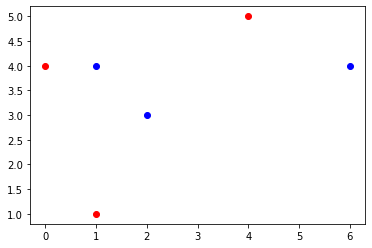

In [6]:
p = [[2, 3], [4, 5], [1,1], [0, 4], [6, 4], [1, 4]]
kcenters = KCenters(k=3)
kcenters.fit(p)
mapping = kcenters.assign()

for idx, i in enumerate(p):
    colour = 'blue'
    if idx in kcenters.centers:
        colour = 'red'
    plt.scatter(i[0], i[1], color=colour)
print(kcenters.costs)
plt.show()

### Hierarchical capacitated clustering

Mapping [(0, 5), (1, 5), (2, 5), (3, 4), (4, 4), (5, 5), (6, 5), (7, 4), (8, 8)]
Cost: [0.0, 1.0, 3.1622776601683795]


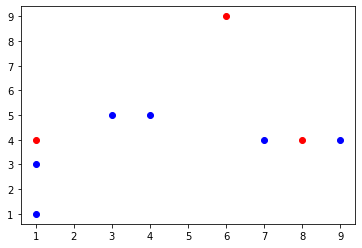

In [7]:
p = [[1, 3], [4, 5], [1,1], [9, 4], [8, 4], [1, 4],[3,5],[7,4],[6,9]]
weights = []
for i in range(len(p)):
    weights.append(1)
hclust = Hierarchical_Clustering(k=3)
hclust.fit(p,6,weights,'centroid')
mapping = hclust.assign()
print("Mapping", mapping)
for idx, i in enumerate(p):
    colour = 'blue'
    if idx in hclust.centers:
        colour = 'red'
    plt.scatter(i[0], i[1], color=colour)
print("Cost:", hclust.costs)
plt.show()

In [6]:
#weights = []
#for i in range(len(dl.data_list)):
#    weights.append(2)
#for k in range(8, 9):
#    hclust = Hierarchical_Clustering(k)
#    capacity = int((len(dl.data_list)*2*1.2)/k)
#    hclust.fit(dl.data_list,capacity,weights,'average')
#    mapping = hclust.assign()
    #print("Mapping: ", mapping)

### K-Medoids clustering

Mapping [(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 8)]
Cost: [13.384402799378824, 5.0, 0.0]


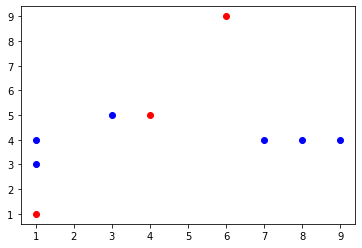

In [8]:
p = [[1, 3], [4, 5], [1,1], [9, 4], [8, 4], [1, 4],[3,5],[7,4],[6,9]]
kmedoid = kMedoids(n_cluster=3)
kmedoid.fit(p)
mapping = kmedoid.assign()
print("Mapping", mapping)
for idx, i in enumerate(p):
    colour = 'blue'
    if idx in kmedoid.medoids:
        colour = 'red'
    plt.scatter(i[0], i[1], color=colour)
print("Cost:", kmedoid.costs)
plt.show()

### K-Medoids knapsack capacitated clustering

Mapping [(0, 2), (1, 8), (2, 2), (3, 4), (4, 4), (5, 2), (6, 8), (7, 4), (8, 8)]
Cost: [9.47213595499958, 5.0, 2.0]


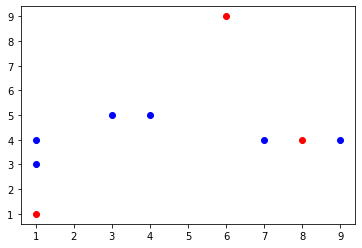

In [15]:
p = [[1, 3], [4, 5], [1,1], [9, 4], [8, 4], [1, 4],[3,5],[7,4],[6,9]]
weights = []
for i in range(len(p)):
    weights.append(2)
kmedoid_Knapsack = KMedoids_Knapsack(k=3)
kmedoid_Knapsack.fit(p,6,weights)
mapping = kmedoid_Knapsack.assign()
print("Mapping", mapping)
for idx, i in enumerate(p):
    colour = 'blue'
    if idx in kmedoid_Knapsack.medoids:
        colour = 'red'
    plt.scatter(i[0], i[1], color=colour)
print("Cost:", kmedoid_Knapsack.costs)
plt.show()

In [24]:
kmedoid_Knapsack.clusters

{8: [1, 6, 8], 2: [0, 2, 5], 4: [3, 4, 7]}

In [28]:
dictionary = {}
for i in range(3):
    dictionary[i]=[]
    for j in range(5):
        dictionary[i].append(j)

In [29]:
dictionary

{0: [0, 1, 2, 3, 4], 1: [0, 1, 2, 3, 4], 2: [0, 1, 2, 3, 4]}

### k-Medoids on the dataset

Time taken for Degree 3 - 1.211 seconds.
Time taken for Degree 4 - 1.326 seconds.
Time taken for Degree 5 - 0.846 seconds.
Time taken for Degree 6 - 0.922 seconds.
Time taken for Degree 7 - 0.712 seconds.
Time taken for Degree 8 - 0.977 seconds.
Time taken for Degree 9 - 1.205 seconds.
Time taken for Degree 10 - 0.894 seconds.
Time taken for Degree 11 - 1.117 seconds.
Time taken for Degree 12 - 1.188 seconds.
Time taken for Degree 13 - 1.038 seconds.
Time taken for Degree 14 - 1.538 seconds.
Time taken for Degree 15 - 1.248 seconds.
Time taken for Degree 16 - 1.255 seconds.
Time taken for Degree 17 - 1.614 seconds.
Time taken for Degree 18 - 1.703 seconds.
Time taken for Degree 19 - 1.656 seconds.
Time taken for Degree 20 - 1.714 seconds.


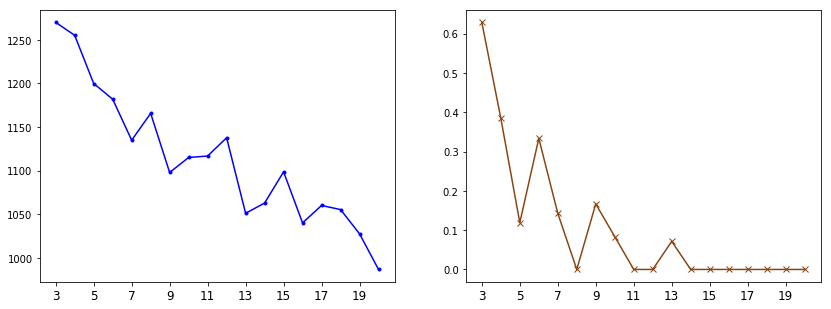

In [50]:
kmedoid_degrees = []
kmedoid_costs = []
kmedoid_balances = []
kmedoid_capacities = []

for degree in range(3, degrees+1,1):
    start_time = time.time()
    kmedoid = kMedoids(n_cluster=degree)
    kmedoid.fit(dl.data_list)
    mapping = kmedoid.assign()
    kmedoid_degrees.append(degree)
    kmedoid_costs.append(sum(kmedoid.costs))
    balance,cap = balance_calculation(dl.data_list, kmedoid.medoids, mapping)
    #unfair_balances.append(balance_calculation(dl.data_list, kcenters.centers, mapping))
    kmedoid_balances.append(balance)
    kmedoid_capacities.append(cap)
    print("Time taken for Degree %d - %.3f seconds."%(degree, time.time() - start_time))

plot_analysis(kmedoid_degrees, kmedoid_costs, kmedoid_balances, step_size=2)

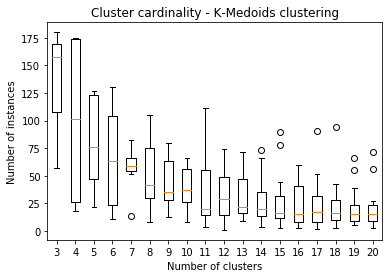

In [51]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - K-Medoids clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(kmedoid_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('kMedoids-Student-mat.pdf')

### Hierarchical on the dataset

k= 3
Time taken for Degree 3 - 77.601 seconds.
k= 4
Time taken for Degree 4 - 62.852 seconds.
k= 5
Time taken for Degree 5 - 56.575 seconds.
k= 6
Time taken for Degree 6 - 52.048 seconds.
k= 7
Time taken for Degree 7 - 45.746 seconds.
k= 8
Time taken for Degree 8 - 42.923 seconds.
k= 9
Time taken for Degree 9 - 46.090 seconds.
k= 10
Time taken for Degree 10 - 40.552 seconds.
k= 11
Time taken for Degree 11 - 38.877 seconds.
k= 12
Time taken for Degree 12 - 39.252 seconds.
k= 13
Time taken for Degree 13 - 34.180 seconds.
k= 14
Time taken for Degree 14 - 34.345 seconds.
k= 15
Time taken for Degree 15 - 34.539 seconds.
k= 16
Time taken for Degree 16 - 34.457 seconds.
k= 17
Time taken for Degree 17 - 34.956 seconds.
k= 18
Time taken for Degree 18 - 34.462 seconds.
k= 19
Time taken for Degree 19 - 29.000 seconds.
k= 20
Time taken for Degree 20 - 29.858 seconds.


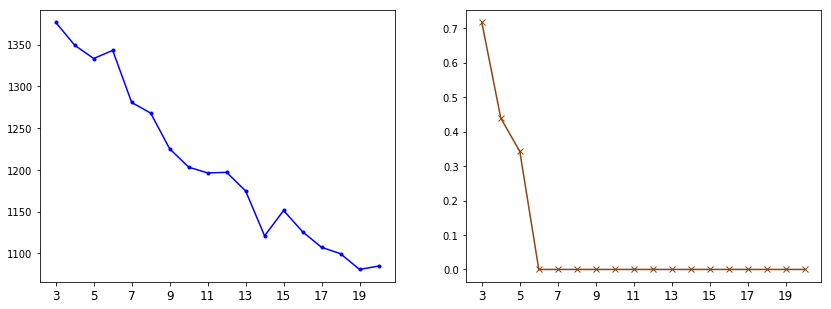

In [12]:
hclust_degrees = []
hclust_costs = []
hclust_balances = []
hclust_capacities = []
hclust_ideal_capacity = []

for degree in range(3, degrees+1,1):
    start_time = time.time()
    print("k=",degree)
    capacity = int(len(dl.data_list)*1.2/degree)
    hclust_ideal_capacity.append(capacity)
    hclust = Hierarchical_Capacitated(k=degree)
    hclust.fit(dl.data_list,capacity,'centroid')
    mapping = hclust.assign()
    hclust_degrees.append(degree)
    hclust_costs.append(sum(hclust.costs))
    balance,cap = balance_calculation(dl.data_list, hclust.centers, mapping)
    #unfair_balances.append(balance_calculation(dl.data_list, kcenters.centers, mapping))
    hclust_balances.append(balance)
    hclust_capacities.append(cap)
    print("Time taken for Degree %d - %.3f seconds."%(degree, time.time() - start_time))

plot_analysis(hclust_degrees, hclust_costs, hclust_balances, step_size=2)

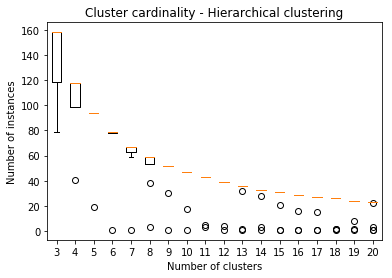

In [13]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - Hierarchical clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(hclust_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('hclust-mat.pdf')

### K-Centers on the dataset

Time taken for Degree 3 - 0.093 seconds.
Time taken for Degree 4 - 0.136 seconds.
Time taken for Degree 5 - 0.189 seconds.
Time taken for Degree 6 - 0.240 seconds.
Time taken for Degree 7 - 0.251 seconds.
Time taken for Degree 8 - 0.324 seconds.
Time taken for Degree 9 - 0.492 seconds.
Time taken for Degree 10 - 0.439 seconds.
Time taken for Degree 11 - 0.546 seconds.
Time taken for Degree 12 - 0.600 seconds.
Time taken for Degree 13 - 0.693 seconds.
Time taken for Degree 14 - 0.819 seconds.
Time taken for Degree 15 - 0.855 seconds.
Time taken for Degree 16 - 0.994 seconds.
Time taken for Degree 17 - 1.189 seconds.
Time taken for Degree 18 - 1.202 seconds.
Time taken for Degree 19 - 1.367 seconds.
Time taken for Degree 20 - 1.478 seconds.


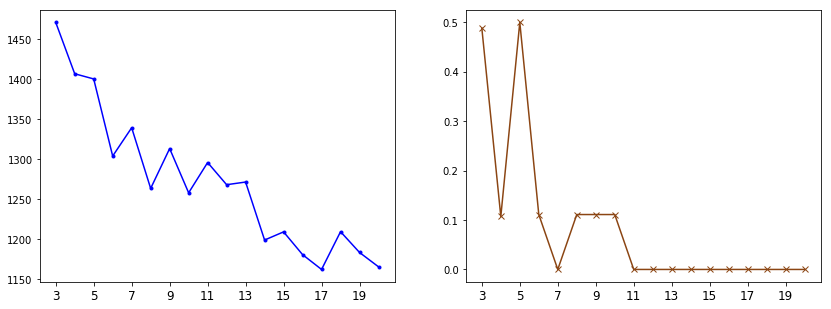

In [11]:
unfair_degrees = []
unfair_costs = []
unfair_balances = []
unfair_capacities = []

for degree in range(3, degrees+1,1):
    start_time = time.time()
    kcenters = KCenters(k=degree)
    kcenters.fit(dl.data_list)
    mapping = kcenters.assign()
    unfair_degrees.append(degree)
    cost = []
    for j in kcenters.centers:
        cluster = []
        for (x, y) in mapping:
            if (y == j):
                cluster.append(x)
        cost.append(sum([distance(dl.data_list[j], dl.data_list[i]) for i in cluster]))
    #unfair_costs.append(kcenters.costs[-1]) #max-min-max
    unfair_costs.append(sum(cost)) #sum-sum
    balance,cap = balance_calculation(dl.data_list, kcenters.centers, mapping)
    #unfair_balances.append(balance_calculation(dl.data_list, kcenters.centers, mapping))
    unfair_balances.append(balance)
    unfair_capacities.append(cap)
    print("Time taken for Degree %d - %.3f seconds."%(degree, time.time() - start_time))

plot_analysis(unfair_degrees, unfair_costs, unfair_balances, step_size=2)

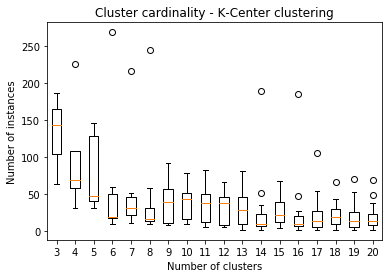

In [12]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - K-Center clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(unfair_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('kCenter-Student-mat.pdf')

### Vanilla Fairlet Decomposition

187 fairlets have been identified.
Len of data:  395
Time taken for Degree 3 - 0.435 seconds.
Time taken for Degree 4 - 0.373 seconds.
Time taken for Degree 5 - 0.296 seconds.
Time taken for Degree 6 - 0.254 seconds.
Time taken for Degree 7 - 0.172 seconds.
Time taken for Degree 8 - 0.306 seconds.
Time taken for Degree 9 - 0.320 seconds.
Time taken for Degree 10 - 0.313 seconds.
Time taken for Degree 11 - 0.391 seconds.
Time taken for Degree 12 - 0.431 seconds.
Time taken for Degree 13 - 0.445 seconds.
Time taken for Degree 14 - 0.471 seconds.
Time taken for Degree 15 - 0.515 seconds.
Time taken for Degree 16 - 0.578 seconds.
Time taken for Degree 17 - 0.596 seconds.
Time taken for Degree 18 - 0.658 seconds.
Time taken for Degree 19 - 0.720 seconds.
Time taken for Degree 20 - 0.756 seconds.


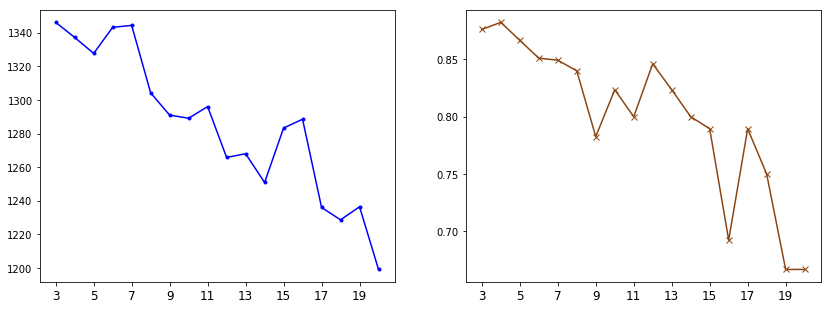

In [39]:
# Instantiating the Vanilla Decomposition per Lemma 3 in NeurIPS 2017 Paper
vfd = VanillaFairletDecomposition(1, 2, blues, reds, dl.data_list)

# Decomposing for fairlets and performing traditional clustering
vanilla_fairlets, vanilla_fairlet_centers, vanilla_fairlet_costs = vfd.decompose()

#Only run below codes when having the fairlets
vanilla_degrees, vanilla_costs, vanilla_balances, vanilla_capacities = run_experiments_kmedoids(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers)
plot_analysis(vanilla_degrees, vanilla_costs, vanilla_balances, step_size=2)

Len of data:  395
Time taken for Degree 3 - 0.076 seconds.
Time taken for Degree 4 - 0.075 seconds.
Time taken for Degree 5 - 0.097 seconds.
Time taken for Degree 6 - 0.126 seconds.
Time taken for Degree 7 - 0.160 seconds.
Time taken for Degree 8 - 0.191 seconds.
Time taken for Degree 9 - 0.198 seconds.
Time taken for Degree 10 - 0.229 seconds.
Time taken for Degree 11 - 0.262 seconds.
Time taken for Degree 12 - 0.279 seconds.
Time taken for Degree 13 - 0.360 seconds.
Time taken for Degree 14 - 0.416 seconds.
Time taken for Degree 15 - 0.423 seconds.
Time taken for Degree 16 - 0.497 seconds.
Time taken for Degree 17 - 0.571 seconds.
Time taken for Degree 18 - 0.637 seconds.
Time taken for Degree 19 - 0.667 seconds.
Time taken for Degree 20 - 0.698 seconds.


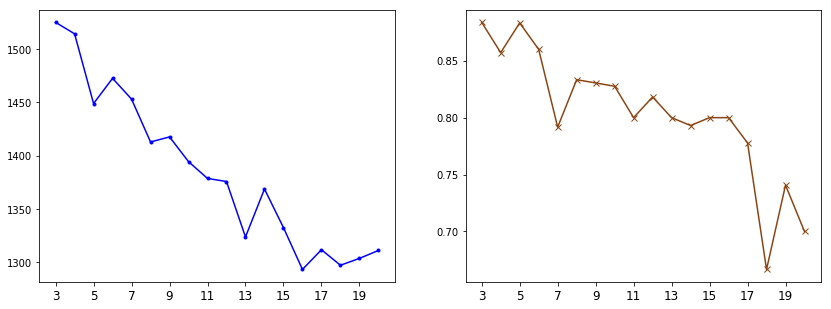

In [9]:
#Only run below codes when having the fairlets
vanilla_degrees, vanilla_costs, vanilla_balances, vanilla_capacities = run_experiments_kcenter(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers)
plot_analysis(vanilla_degrees, vanilla_costs, vanilla_balances, step_size=2)

In [40]:
#Save to files vanilla fairlets
df = pd.DataFrame(vanilla_fairlets)
df.to_csv('vanilla-fairlets-student-mat.csv',index=False)
#Vanilla centers and costs
df = pd.DataFrame(list(zip(vanilla_fairlet_centers,vanilla_fairlet_costs)), 
               columns =['Vanilla Fairlet Centers','Vanilla Fairlet Costs'])
df.to_csv('vanilla-fairlets-centers-costs-student-mat.csv',index=False)

In [7]:
#Read fairlets from files
import math

df=pd.read_csv("vanilla-fairlets-student-mat.csv",na_filter=True,header=0)
x=df.values
vanilla_fairlets=[]
for row in x:
    temp=[]
    for i in row:
        t=float(i)
        if math.isnan(t)==False:
            temp.append(int(i))
    vanilla_fairlets.append(temp)
    
#Read fairlet centers and costs from files
df=pd.read_csv('vanilla-fairlets-centers-costs-student-mat.csv')
vanilla_fairlet_centers = list(df['Vanilla Fairlet Centers'].values)
vanilla_fairlet_costs = list(df['Vanilla Fairlet Costs'].values)

In [15]:
import pandas as pd
len_fairlet=[]
for fairlet in vanilla_fairlets:
    len_fairlet.append(len(fairlet))   
num_fairlets = pd.DataFrame({'capacity': len_fairlet})
num_fairlets["capacity"].value_counts()
#print("Number of fairlet: ", len(vanilla_fairlets))

2    166
3     21
Name: capacity, dtype: int64

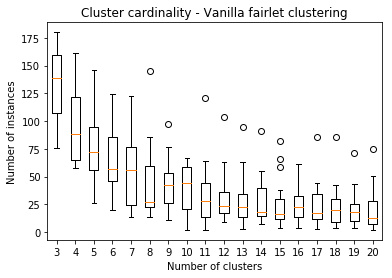

In [16]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - Vanilla fairlet clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(vanilla_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('Vanilla-Student-mat.pdf')

### Vanilla Fairlet Decomposition - Hierarchical capacitated clustering

Degree:  3
Capacity: 158
Time taken for Degree 3 - 7.742 seconds.
Degree:  4
Capacity: 118
Time taken for Degree 4 - 6.756 seconds.
Degree:  5
Capacity: 94
Time taken for Degree 5 - 5.979 seconds.
Degree:  6
Capacity: 79
Time taken for Degree 6 - 5.743 seconds.
Degree:  7
Capacity: 67
Time taken for Degree 7 - 4.943 seconds.
Degree:  8
Capacity: 59
Time taken for Degree 8 - 4.582 seconds.
Degree:  9
Capacity: 52
Time taken for Degree 9 - 4.508 seconds.
Degree:  10
Capacity: 47
Time taken for Degree 10 - 4.345 seconds.
Degree:  11
Capacity: 43
Time taken for Degree 11 - 4.290 seconds.
Degree:  12
Capacity: 39
Time taken for Degree 12 - 3.926 seconds.
Degree:  13
Capacity: 36
Time taken for Degree 13 - 3.795 seconds.
Degree:  14
Capacity: 33
Time taken for Degree 14 - 3.598 seconds.
Degree:  15
Capacity: 31
Time taken for Degree 15 - 3.483 seconds.
Degree:  16
Capacity: 29
Time taken for Degree 16 - 3.505 seconds.
Degree:  17
Capacity: 27
Time taken for Degree 17 - 3.526 seconds.
Degree:

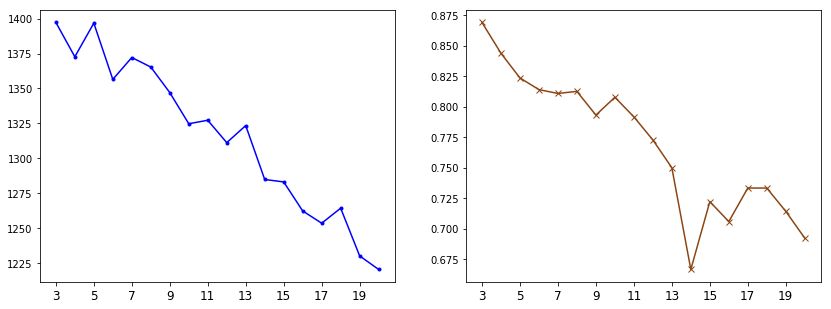

In [41]:
#Run again, only in neccessary case
#vfd = VanillaFairletDecomposition(1, 2, blues, reds, dl.data_list)

# Decomposing for fairlets and performing traditional clustering
#vanilla_fairlets, vanilla_fairlet_centers, vanilla_fairlet_costs = vfd.decompose()
weight_vanilla_fairlets = [len(vanilla_fairlets[i]) for i in range(len(vanilla_fairlets))]
vanilla_degrees_hierarchical, vanilla_costs_hierarchical, vanilla_balances_hierarchical, vanilla_capacitated_capacities, vanilla_ideal_capacity = run_experiments_hierarchical(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers,weight_vanilla_fairlets)
plot_analysis(vanilla_degrees_hierarchical, vanilla_costs_hierarchical, vanilla_balances_hierarchical, step_size=2)

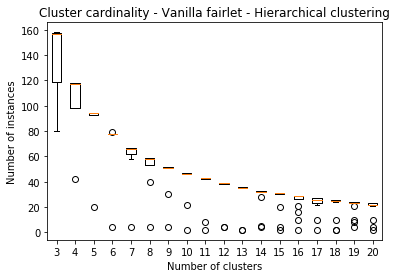

In [42]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - Vanilla fairlet - Hierarchical clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(vanilla_capacitated_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('Vanilla_Hierarchical-Student-mat.pdf')

In [43]:
vanilla_ideal_capacity

[158, 118, 94, 79, 67, 59, 52, 47, 43, 39, 36, 33, 31, 29, 27, 26, 24, 23]

### Vanilla Fairlet Decomposition - kMedoids knapsack clustering

Time taken for Degree 3 - 0.743 seconds.
Time taken for Degree 4 - 0.835 seconds.
Time taken for Degree 5 - 0.749 seconds.
Time taken for Degree 6 - 0.500 seconds.
Time taken for Degree 7 - 0.691 seconds.
Time taken for Degree 8 - 0.499 seconds.
Time taken for Degree 9 - 0.881 seconds.
Time taken for Degree 10 - 0.791 seconds.
Time taken for Degree 11 - 0.754 seconds.
Time taken for Degree 12 - 0.736 seconds.
Time taken for Degree 13 - 0.923 seconds.
Time taken for Degree 14 - 0.788 seconds.
Time taken for Degree 15 - 0.984 seconds.
Time taken for Degree 16 - 0.695 seconds.
Time taken for Degree 17 - 0.956 seconds.
Time taken for Degree 18 - 1.141 seconds.
Time taken for Degree 19 - 0.977 seconds.
Time taken for Degree 20 - 1.098 seconds.


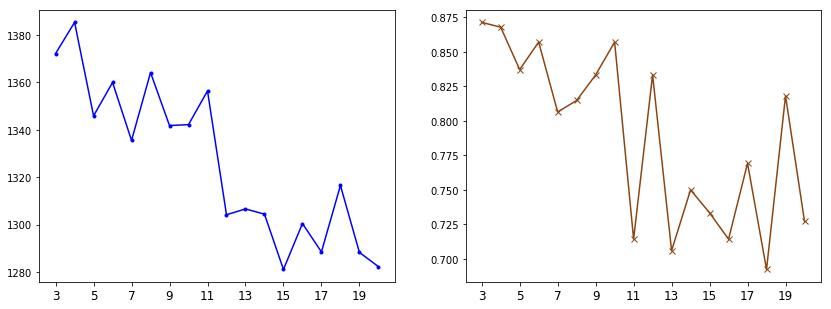

In [20]:
#Only the clustering methods
weight_vanilla_fairlets = [len(vanilla_fairlets[i]) for i in range(len(vanilla_fairlets))]
vanilla_degrees_kmedoids_knapsack, vanilla_costs_kmedoids_knapsack, vanilla_balances_kmedoids_knapsack, vanilla_kmedoids_knapsack_capacities, vanilla_kmedois_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers,weight_vanilla_fairlets,20,decay_lambda)
plot_analysis(vanilla_degrees_kmedoids_knapsack, vanilla_costs_kmedoids_knapsack, vanilla_balances_kmedoids_knapsack, step_size=2)

In [ ]:
#Find the best lambda based on fairness
decay_lambda = 0.1
best_average = 0
for i in range(10):
    print("Lambda:",decay_lambda)
    weight_vanilla_fairlets = [len(vanilla_fairlets[i]) for i in range(len(vanilla_fairlets))]
    vanilla_degrees_kmedoids_knapsack, vanilla_costs_kmedoids_knapsack, vanilla_balances_kmedoids_knapsack, vanilla_kmedoids_knapsack_capacities, vanilla_kmedois_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers,weight_vanilla_fairlets,20,decay_lambda)
    average = sum(vanilla_balances_kmedoids_knapsack) / len(vanilla_balances_kmedoids_knapsack) 
    print("Average balance: ",average)
    if best_average < average:
        best_average = average
        best_decay_lambda = decay_lambda
    decay_lambda += 0.1
print("The best lamda is:",best_decay_lambda)
print("The best average is:",best_average)

In [ ]:
#Find the best lambda based on clustering cost
decay_lambda = 0.1
best_average = 100000
for i in range(10):
    print("Lambda:",decay_lambda)
    weight_vanilla_fairlets = [len(vanilla_fairlets[i]) for i in range(len(vanilla_fairlets))]
    vanilla_degrees_kmedoids_knapsack, vanilla_costs_kmedoids_knapsack, vanilla_balances_kmedoids_knapsack, vanilla_kmedoids_knapsack_capacities, vanilla_kmedois_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers,weight_vanilla_fairlets,20,decay_lambda)
    average = sum(vanilla_costs_kmedoids_knapsack) / len(vanilla_costs_kmedoids_knapsack) 
    print("Average balance: ",average)
    if best_average > average:
        best_average = average
        best_decay_lambda = decay_lambda
    decay_lambda += 0.1
print("The best lamda is:",best_decay_lambda)
print("The best average is:",best_average)

In [ ]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - Vanilla fairlet - kMedoids knapsack clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(vanilla_kmedoids_knapsack_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('Vanilla_kmedoid_knapsack_Student_mat.pdf')

### MCF Fairlet Decomposition

Len of data:  395
Time taken for Degree 3 - 0.280 seconds.
Time taken for Degree 4 - 0.316 seconds.
Time taken for Degree 5 - 0.282 seconds.
Time taken for Degree 6 - 0.282 seconds.
Time taken for Degree 7 - 0.247 seconds.
Time taken for Degree 8 - 0.241 seconds.
Time taken for Degree 9 - 0.283 seconds.
Time taken for Degree 10 - 0.361 seconds.
Time taken for Degree 11 - 0.398 seconds.
Time taken for Degree 12 - 0.462 seconds.
Time taken for Degree 13 - 0.490 seconds.
Time taken for Degree 14 - 0.484 seconds.
Time taken for Degree 15 - 0.633 seconds.
Time taken for Degree 16 - 0.641 seconds.
Time taken for Degree 17 - 0.616 seconds.
Time taken for Degree 18 - 0.688 seconds.
Time taken for Degree 19 - 0.750 seconds.
Time taken for Degree 20 - 0.839 seconds.


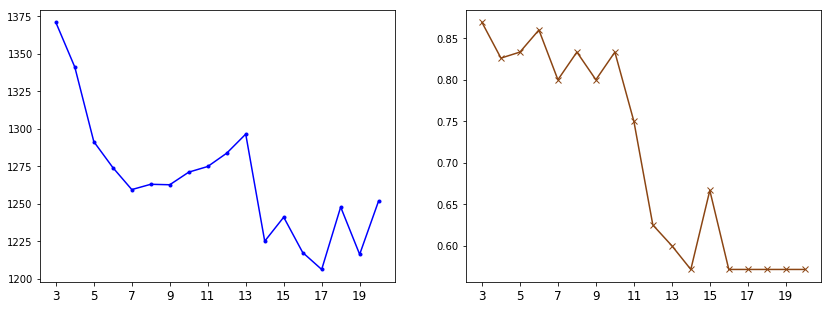

In [24]:
# Instantiating the MCF Decomposition
#mcf = MCFFairletDecomposition(blues, reds, 2, config[source]['distance_threshold'], dl.data_list)

# Computing the distance matrix between blue and red nodes
#mcf.compute_distances()

# Adding nodes and edges
#mcf.build_graph(plot_graph=True)

# Decomposing for fairlets and performing traditional clustering
#mcf_fairlets, mcf_fairlet_centers, mcf_fairlet_costs = mcf.decompose()

#If having fairlets already
mcf_degrees, mcf_costs, mcf_balances, mcf_capacities = run_experiments_kmedoids(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers)
plot_analysis(mcf_degrees, mcf_costs, mcf_balances, step_size=2)

Len of data:  395
Time taken for Degree 3 - 0.075 seconds.
Time taken for Degree 4 - 0.075 seconds.
Time taken for Degree 5 - 0.089 seconds.
Time taken for Degree 6 - 0.121 seconds.
Time taken for Degree 7 - 0.160 seconds.
Time taken for Degree 8 - 0.180 seconds.
Time taken for Degree 9 - 0.190 seconds.
Time taken for Degree 10 - 0.226 seconds.
Time taken for Degree 11 - 0.269 seconds.
Time taken for Degree 12 - 0.294 seconds.
Time taken for Degree 13 - 0.368 seconds.
Time taken for Degree 14 - 0.418 seconds.
Time taken for Degree 15 - 0.460 seconds.
Time taken for Degree 16 - 0.463 seconds.
Time taken for Degree 17 - 0.525 seconds.
Time taken for Degree 18 - 0.589 seconds.
Time taken for Degree 19 - 0.703 seconds.
Time taken for Degree 20 - 0.794 seconds.


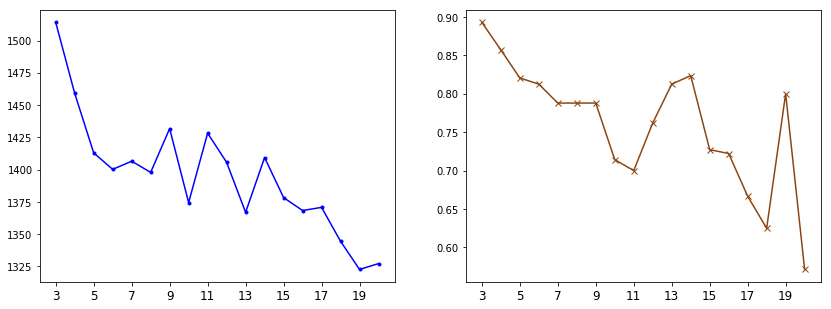

In [10]:
mcf_degrees, mcf_costs, mcf_balances, mcf_capacities = run_experiments_kcenter(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers)
plot_analysis(mcf_degrees, mcf_costs, mcf_balances, step_size=2)

Number of fairlet:  187


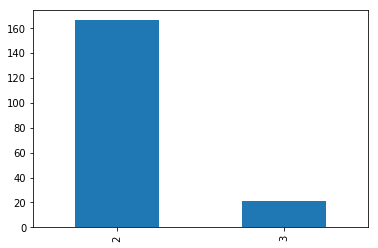

In [25]:
len_mcf_fairlet=[]
for fairlet in mcf_fairlets:
    len_mcf_fairlet.append(len(fairlet))   
num_mcf_fairlets = pd.DataFrame({'capacity': len_mcf_fairlet})
num_mcf_fairlets["capacity"].value_counts().plot(kind='bar')
print("Number of fairlet: ", len(mcf_fairlets))

In [ ]:
#Save to files mcf fairlets
df = pd.DataFrame(mcf_fairlets)
df.to_csv('MCF-fairlets-student-mat.csv',index=False)
#MCF centers and costs
df = pd.DataFrame(list(zip(mcf_fairlet_centers,mcf_fairlet_costs)), 
               columns =['MCF Fairlet Centers','MCF Fairlet Costs'])
df.to_csv('MCF-fairlets-centers-costs-student-mat.csv',index=False)

In [8]:
#Read fairlets from files
import math

df=pd.read_csv("MCF-fairlets-student-mat.csv",na_filter=True,header=0)
x=df.values
mcf_fairlets=[]
for row in x:
    temp=[]
    for i in row:
        t=float(i)
        if math.isnan(t)==False:
            temp.append(int(i))
    mcf_fairlets.append(temp)
    
#Read fairlet centers and costs from files
df=pd.read_csv('MCF-fairlets-centers-costs-student-mat.csv')
mcf_fairlet_centers = list(df['MCF Fairlet Centers'].values)
mcf_fairlet_costs = list(df['MCF Fairlet Costs'].values)

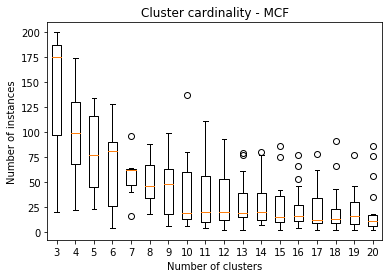

In [26]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - MCF")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(mcf_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('MCF-Student-mat.pdf')

### MCF Fairlet Decomposition - Hierarchical capacitated

Degree:  3
Capacity: 158
Time taken for Degree 3 - 7.374 seconds.
Degree:  4
Capacity: 118
Time taken for Degree 4 - 6.279 seconds.
Degree:  5
Capacity: 94
Time taken for Degree 5 - 5.638 seconds.
Degree:  6
Capacity: 79
Time taken for Degree 6 - 5.702 seconds.
Degree:  7
Capacity: 67
Time taken for Degree 7 - 5.488 seconds.
Degree:  8
Capacity: 59
Time taken for Degree 8 - 5.021 seconds.
Degree:  9
Capacity: 52
Time taken for Degree 9 - 4.363 seconds.
Degree:  10
Capacity: 47
Time taken for Degree 10 - 4.349 seconds.
Degree:  11
Capacity: 43
Time taken for Degree 11 - 4.253 seconds.
Degree:  12
Capacity: 39
Time taken for Degree 12 - 4.072 seconds.
Degree:  13
Capacity: 36
Time taken for Degree 13 - 4.060 seconds.
Degree:  14
Capacity: 33
Time taken for Degree 14 - 3.881 seconds.
Degree:  15
Capacity: 31
Time taken for Degree 15 - 3.484 seconds.
Degree:  16
Capacity: 29
Time taken for Degree 16 - 3.505 seconds.
Degree:  17
Capacity: 27
Time taken for Degree 17 - 3.408 seconds.
Degree:

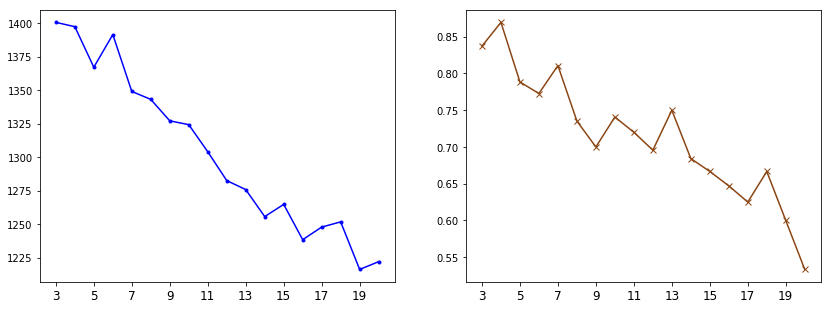

In [27]:
# Instantiating the MCF Decomposition
#mcf = MCFFairletDecomposition(blues, reds, 2, config[source]['distance_threshold'], dl.data_list)

# Computing the distance matrix between blue and red nodes
#mcf.compute_distances()

# Adding nodes and edges
#mcf.build_graph(plot_graph=True)

# Decomposing for fairlets and performing traditional clustering
#mcf_fairlets, mcf_fairlet_centers, mcf_fairlet_costs = mcf.decompose()

weight_mcf_fairlets = [len(mcf_fairlets[i]) for i in range(len(mcf_fairlets))]
mcf_degrees_hclust, mcf_costs_hclust, mcf_balances_hclust, mcf_capacitated_capacities, mcf_capacitated_ideal_capacity = run_experiments_hierarchical(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers,weight_mcf_fairlets)
plot_analysis(mcf_degrees_hclust, mcf_costs_hclust, mcf_balances_hclust, step_size=2)

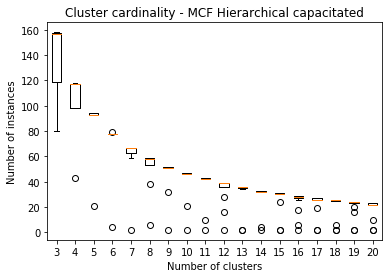

In [28]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - MCF Hierarchical capacitated")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(mcf_capacitated_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('MCF-Capacitated-Student-mat.pdf')

In [29]:
mcf_capacitated_ideal_capacity

[158, 118, 94, 79, 67, 59, 52, 47, 43, 39, 36, 33, 31, 29, 27, 26, 24, 23]

### MCF Fairlet Decomposition - kMedoids knapsack clustering

In [ ]:
#Find the best lambda based on fairness
decay_lambda = 0.1
best_average = 0
for i in range(10):
    print("Lambda:",decay_lambda)
    # Decomposing for fairlets and performing traditional clustering
    weight_mcf_fairlets = [len(mcf_fairlets[i]) for i in range(len(mcf_fairlets))]
    mcf_degrees_kmedoid_knapsack, mcf_costs_kmedoid_knapsack, mcf_balances_kmedoid_knapsack, mcf_kmedoid_knapsack_capacities, mcf_kmedoid_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers,weight_mcf_fairlets,10,decay_lambda)

    average = sum(mcf_balances_kmedoid_knapsack) / len(mcf_balances_kmedoid_knapsack) 
    print("Average balance: ",average)
    if best_average < average:
        best_average = average
        best_decay_lambda = decay_lambda
    decay_lambda += 0.1
print("The best lamda is:",best_decay_lambda)
print("The best average is:",best_average)

In [ ]:
#Find the best lambda based on clustering cost
decay_lambda = 0.1
best_average = 100000
for i in range(10):
    print("Lambda:",decay_lambda)
    # Decomposing for fairlets and performing traditional clustering
    weight_mcf_fairlets = [len(mcf_fairlets[i]) for i in range(len(mcf_fairlets))]
    mcf_degrees_kmedoid_knapsack, mcf_costs_kmedoid_knapsack, mcf_balances_kmedoid_knapsack, mcf_kmedoid_knapsack_capacities, mcf_kmedoid_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers,weight_mcf_fairlets,10,decay_lambda)

    average = sum(mcf_costs_kmedoid_knapsack) / len(mcf_costs_kmedoid_knapsack) 
    print("Average balance: ",average)
    if best_average > average:
        best_average = average
        best_decay_lambda = decay_lambda
    decay_lambda += 0.1
print("The best lamda is:",best_decay_lambda)
print("The best average is:",best_average)

Time taken for Degree 3 - 0.803 seconds.
Time taken for Degree 4 - 0.473 seconds.
Time taken for Degree 5 - 0.725 seconds.
Time taken for Degree 6 - 0.476 seconds.
Time taken for Degree 7 - 0.456 seconds.
Time taken for Degree 8 - 0.688 seconds.
Time taken for Degree 9 - 0.675 seconds.
Time taken for Degree 10 - 0.510 seconds.
Time taken for Degree 11 - 0.722 seconds.
Time taken for Degree 12 - 0.721 seconds.
Time taken for Degree 13 - 0.760 seconds.
Time taken for Degree 14 - 0.620 seconds.
Time taken for Degree 15 - 0.665 seconds.
Time taken for Degree 16 - 0.862 seconds.
Time taken for Degree 17 - 1.070 seconds.
Time taken for Degree 18 - 0.947 seconds.
Time taken for Degree 19 - 0.848 seconds.
Time taken for Degree 20 - 0.934 seconds.


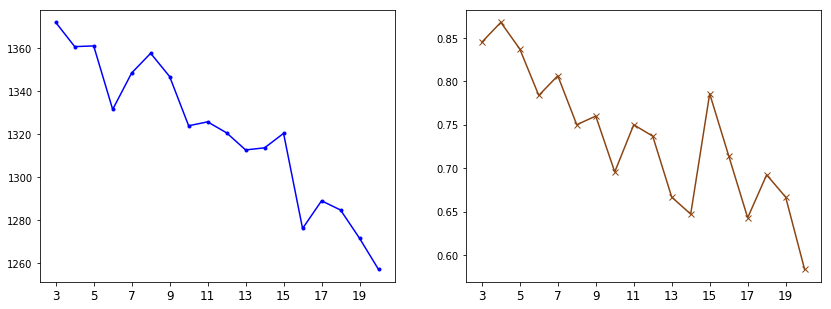

In [30]:
# Decomposing for fairlets and performing traditional clustering
weight_mcf_fairlets = [len(mcf_fairlets[i]) for i in range(len(mcf_fairlets))]
mcf_degrees_kmedoid_knapsack, mcf_costs_kmedoid_knapsack, mcf_balances_kmedoid_knapsack, mcf_kmedoid_knapsack_capacities, mcf_kmedoid_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers,weight_mcf_fairlets,10,decay_lambda)
plot_analysis(mcf_degrees_kmedoid_knapsack, mcf_costs_kmedoid_knapsack, mcf_balances_kmedoid_knapsack, step_size=2)

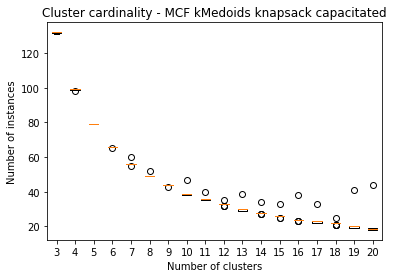

In [31]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - MCF kMedoids knapsack capacitated")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(mcf_kmedoid_knapsack_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('MCF-kmedoid_knapsack-Student-mat.pdf')

## Save results to files

In [14]:
#Clustering quality
df = pd.DataFrame(list(zip(kmedoid_costs,vanilla_costs, vanilla_costs_hierarchical,vanilla_costs_kmedoids_knapsack,mcf_costs,mcf_costs_hclust,mcf_costs_kmedoid_knapsack)), 
               columns =['k-Medoids', 'Vanilla Fairlet','Vanilla Fairlet Hierarchical Capacitated','Vanilla Fairlet k-Medoids-knapsack Capaciatated','MCF Fairlet','MCF Fairlet Hierarchical Capacitated','MCF Fairlet k-Medoids-knapsack Capacitated'])
df.to_csv('result-cost-student-mat.csv',index=False)
#Clustering fairness
df = pd.DataFrame(list(zip(kmedoid_balances,vanilla_balances, vanilla_balances_hierarchical,vanilla_balances_kmedoids_knapsack,mcf_balances,mcf_balances_hclust,mcf_balances_kmedoid_knapsack)), 
               columns =['k-Medoids', 'Vanilla Fairlet','Vanilla Fairlet Hierarchical Capacitated','Vanilla Fairlet k-Medoids-knapsack Capaciatated','MCF Fairlet','MCF Fairlet Hierarchical Capacitated','MCF Fairlet k-Medoids-knapsack Capacitated'])
df.to_csv('result-balances-student-mat.csv',index=False)
#Capacities
df = pd.DataFrame(kmedoid_capacities)
df.to_csv('result-capacity-kmedoid-student-mat.csv',index=False)

df = pd.DataFrame(vanilla_capacities)
df.to_csv('result-capacity-vanilla-student-mat.csv',index=False)

df = pd.DataFrame(vanilla_capacitated_capacities)
df.to_csv('result-capacity-vanilla-hierarchical-student-mat.csv',index=False)

df = pd.DataFrame(vanilla_kmedoids_knapsack_capacities)
df.to_csv('result-capacity-vanilla-kmedoids-knapsack-student-mat.csv',index=False)

df = pd.DataFrame(mcf_capacities)
df.to_csv('result-capacity-mcf-student-mat.csv',index=False)

df = pd.DataFrame(mcf_capacitated_capacities)
df.to_csv('result-capacity-mcf-hierarchical-student-mat.csv',index=False)

df = pd.DataFrame(mcf_kmedoid_knapsack_capacities)
df.to_csv('result-capacity-mcf-kmedoids-knapsack-student-mat.csv',index=False)
#Maximum capacity
df = pd.DataFrame(list(zip(mcf_capacitated_ideal_capacity,mcf_kmedoid_knapsack_ideal_capacity)), 
               columns =['Maximum capacity of Hierarchical Capacitated','Maximum capacity of k-Medoid-knapsack Capacitated'])
df.to_csv('result-capacity-student-mat.csv',index=False)

## Read results from files

In [3]:
#Clustering cost
df=pd.read_csv('result-cost-student-mat.csv')
kmedoid_costs = list(df['k-Medoids'].values)
vanilla_costs = list(df['Vanilla Fairlet'].values)
vanilla_costs_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_costs_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_costs = list(df['MCF Fairlet'].values)
mcf_costs_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_costs_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Fairness
df=pd.read_csv('result-balances-student-mat.csv')
kmedoid_balances = list(df['k-Medoids'].values)
vanilla_balances = list(df['Vanilla Fairlet'].values)
vanilla_balances_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_balances_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_balances = list(df['MCF Fairlet'].values)
mcf_balances_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_balances_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Cardinality
import math
#kcenter
df=pd.read_csv("result-capacity-kmedoid-student-mat.csv",na_filter=True,header=0)
x=df.values
kmedoid_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    kmedoid_capacities.append(temp)

#vanilla fairlets
df=pd.read_csv("result-capacity-vanilla-student-mat.csv",na_filter=True,header=0)
x=df.values
vanilla_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacities.append(temp)

#vanilla hierarchical
df=pd.read_csv("result-capacity-vanilla-hierarchical-student-mat.csv",na_filter=True,header=0)
x=df.values
vanilla_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacitated_capacities.append(temp)
    
#vanilla kmedoids-knapsack
df=pd.read_csv("result-capacity-vanilla-kmedoids-knapsack-student-mat.csv",na_filter=True,header=0)
x=df.values
vanilla_kmedoids_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_kmedoids_knapsack_capacities.append(temp)
    
#mcf
df=pd.read_csv("result-capacity-mcf-student-mat.csv",na_filter=True,header=0)
x=df.values
mcf_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacities.append(temp)
    
#mcf hierarchical
df=pd.read_csv("result-capacity-mcf-hierarchical-student-mat.csv",na_filter=True,header=0)
x=df.values
mcf_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacitated_capacities.append(temp)
    
#mcf kmedoids-knapsack
df=pd.read_csv("result-capacity-mcf-kmedoids-knapsack-student-mat.csv",na_filter=True,header=0)
x=df.values
mcf_kmedoid_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_kmedoid_knapsack_capacities.append(temp)

#Maximum capacities
df=pd.read_csv("result-capacity-student-mat.csv",na_filter=True,header=0)
mcf_capacitated_ideal_capacity = list(df['Maximum capacity of Hierarchical Capacitated'].values)
mcf_kmedoid_knapsack_ideal_capacity = list(df['Maximum capacity of k-Medoid-knapsack Capacitated'].values)



## Final Comparison Plot

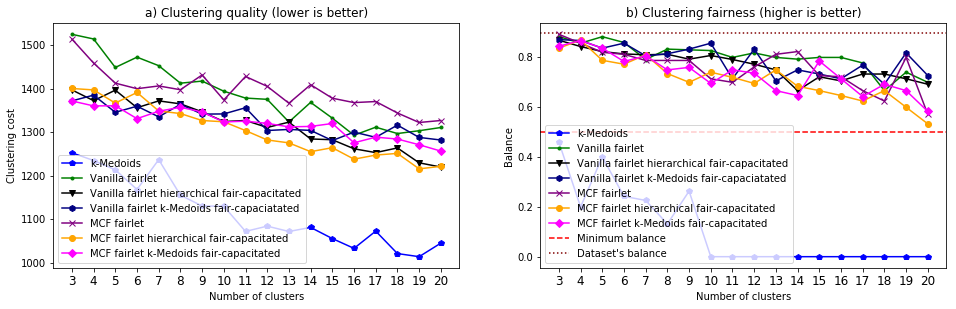

In [10]:
unfair_degrees = [i for i in range(3, degrees+1)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4.5))
#ax[0].plot(unfair_costs, marker='s', color='blue', label="k-Center")
ax[0].plot(kmedoid_costs, marker='p', color='blue', label="k-Medoids")
ax[0].plot(vanilla_costs, marker='.', color='green', label="Vanilla fairlet")
ax[0].plot(vanilla_costs_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[0].plot(vanilla_costs_kmedoids_knapsack, marker='h', color='navy', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[0].plot(mcf_costs, marker='x', color='purple', label="MCF fairlet")
ax[0].plot(mcf_costs_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[0].plot(mcf_costs_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[0].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[0].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[0].set_title("a) Clustering quality (lower is better)")
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Clustering cost")
ax[0].legend()
#ax[1].plot(unfair_balances, marker='s', color='blue', label="k-Center")
ax[1].plot(kmedoid_balances, marker='p', color='blue', label="k-Medoids")
ax[1].plot(vanilla_balances, marker='.', color='green', label="Vanilla fairlet")
ax[1].plot(vanilla_balances_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[1].plot(vanilla_balances_kmedoids_knapsack, marker='h', color='navy', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[1].plot(mcf_balances, marker='x', color='purple', label="MCF fairlet")
ax[1].plot(mcf_balances_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[1].plot(mcf_balances_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[1].axhline(0.5, color='red', linestyle='--', label="Minimum balance")
ax[1].axhline(len(reds)/len(blues), color='maroon', linestyle='dotted', label="Dataset's balance")
ax[1].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[1].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[1].set_title("b) Clustering fairness (higher is better)")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Balance")
ax[1].legend()
plt.savefig('Plot_student_mat_new.pdf',bbox_inches='tight')
plt.show()

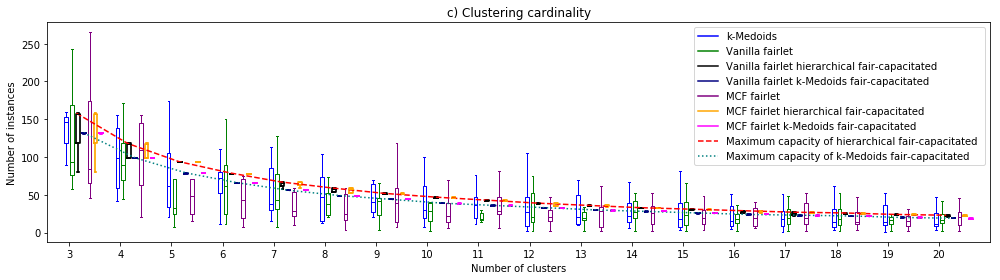

In [9]:
import matplotlib.pyplot as plt
import numpy as np

xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
#for plot ideal capacity
xtrend = [1]
for i in range(1,18):
    xtrend.append(i*7+1)
    
xtrend_2 = [2]
for i in range(1,18):
    xtrend_2.append(i*7+2)
    
ticks = xvalue

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(14,4))

bpl = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0-0.4, sym='', widths=0.5)
#bpm = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0+0.4, sym='', widths=0.5)
bpr = plt.boxplot(vanilla_capacities, positions=np.array(range(len(vanilla_capacities)))*7.0+0.4, sym='', widths=0.5)
bpn = plt.boxplot(vanilla_capacitated_capacities, positions=np.array(range(len(vanilla_capacitated_capacities)))*7.0+1.2, sym='', widths=0.5)
bpk = plt.boxplot(vanilla_kmedoids_knapsack_capacities, positions=np.array(range(len(vanilla_kmedoids_knapsack_capacities)))*7.0+2.0, sym='', widths=0.5)
bpd = plt.boxplot(mcf_capacities, positions=np.array(range(len(mcf_capacities)))*7+2.8, sym='', widths=0.5)
bpe = plt.boxplot(mcf_capacitated_capacities, positions=np.array(range(len(mcf_capacitated_capacities)))*7.0+3.6, sym='', widths=0.5)
bpkm = plt.boxplot(mcf_kmedoid_knapsack_capacities, positions=np.array(range(len(mcf_kmedoid_knapsack_capacities)))*7.0+4.4, sym='', widths=0.5)


#set width of boxplot
linewidth=1.7
def set_box_size(bp,linewidth):
    for box in bp['boxes']:    
        box.set(linewidth=linewidth)
    for box in bp['whiskers']:    
        box.set(linewidth=linewidth)
    for box in bp['caps']:    
        box.set(linewidth=linewidth)

set_box_size(bpn,linewidth)
set_box_size(bpk,linewidth)
set_box_size(bpe,linewidth)
set_box_size(bpkm,linewidth)

#Set color
set_box_color(bpl, 'blue') # colors are from http://colorbrewer2.org/
#set_box_color(bpm, 'navy')
set_box_color(bpr, 'green')
set_box_color(bpn, 'black')
set_box_color(bpk, 'navy')
set_box_color(bpd, 'purple')
set_box_color(bpe, 'orange')
set_box_color(bpkm, 'fuchsia')


# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='blue', label='k-Medoids')
#plt.plot([], c='navy', label='K-Medoids')
plt.plot([], c='green', label='Vanilla fairlet')
plt.plot([], c='black', label='Vanilla fairlet hierarchical fair-capacitated')
plt.plot([], c='navy', label='Vanilla fairlet k-Medoids fair-capacitated')
plt.plot([], c='purple', label='MCF fairlet')
plt.plot([], c='orange', label='MCF fairlet hierarchical fair-capacitated')
plt.plot([], c='fuchsia', label='MCF fairlet k-Medoids fair-capacitated')
plt.plot(xtrend,mcf_capacitated_ideal_capacity,linestyle='--',c='red',label='Maximum capacity of hierarchical fair-capacitated ')
plt.plot(xtrend_2,mcf_kmedoid_knapsack_ideal_capacity,linestyle='dotted',c='teal',label='Maximum capacity of k-Medoids fair-capacitated')

plt.legend()

plt.xticks(range(0, len(ticks) * 7, 7), ticks)
#plt.xticks(xtrue, ticks)
plt.xlim(-3, len(ticks)*7)
plt.title("c) Clustering cardinality")
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
#plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare-student-mat_new.pdf')

## Plot comparison graph

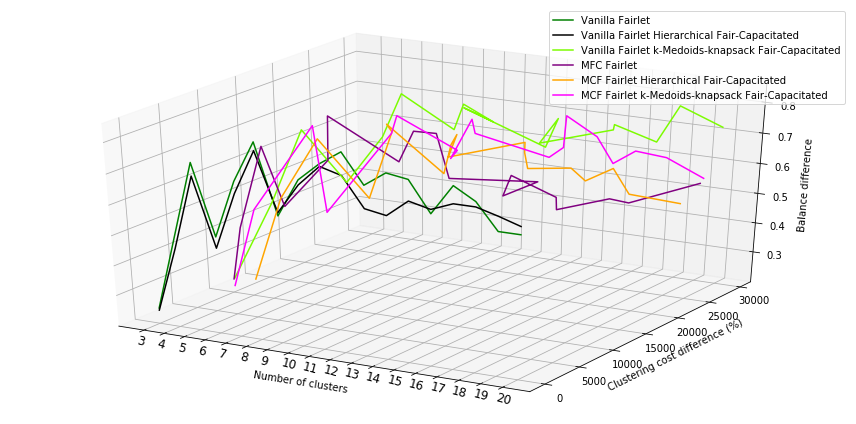

In [57]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,6))

ax = plt.subplot(1,1,1,projection='3d')
#ax.view_init(10,40)
#fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
vanilla_cost_dif = [(vanilla_costs[i]- kmedoid_costs[i])/kmedoid_costs[i] * 100  for i in range(len(kmedoid_costs))]
vanilla_hierarchical_cost_dif=[(vanilla_costs_hierarchical[i]-kmedoid_costs[i])/kmedoid_costs[i] * 100 for i in range(len(kmedoid_costs))]
vanilla_medoids_knapsack_cost_dif = [(vanilla_costs_kmedoids_knapsack[i]-kmedoid_costs[i])*100 for i in range(len(kmedoid_costs))]
mcf_cost_dif = [(mcf_costs[i]-kmedoid_costs[i])*100 for i in range(len(kmedoid_costs))]
mcf_hierarchical_cost_dif = [(mcf_costs_hclust[i]-kmedoid_costs[i])*100 for i in range(len(kmedoid_costs))]
medoids_knapsack_cost_dif = [(mcf_costs_kmedoid_knapsack[i]-kmedoid_costs[i])*100 for i in range(len(kmedoid_costs))]

vanilla_fair_dif = [(vanilla_balances[i]-kmedoid_balances[i]) for i in range(len(kmedoid_balances))]
vanilla_hierarchical_fair_dif = [(vanilla_balances_hierarchical[i]-kmedoid_balances[i]) for i in range(len(kmedoid_balances)) ]
vanilla_kmedoids_knapsack_fair_dif = [(vanilla_balances_kmedoids_knapsack[i]-kmedoid_balances[i]) for i in range(len(kmedoid_balances)) ]
mcf_fair_dif = [(mcf_balances[i]-kmedoid_balances[i]) for i in range(len(kmedoid_balances))]
mcf_hierarchical_fair_dif = [(mcf_balances_hclust[i]-kmedoid_balances[i]) for i in range(len(kmedoid_balances))]
mcf_medoids_knapsack_fair_dif = [(mcf_balances_kmedoid_knapsack[i]-kmedoid_balances[i]) for i in range(len(kmedoid_balances))]

x = [i for i in range(3,21)]

ax.plot(x,vanilla_cost_dif,vanilla_fair_dif, color='green',label='Vanilla Fairlet')
ax.plot(x,vanilla_hierarchical_cost_dif,vanilla_hierarchical_fair_dif, color='black',label='Vanilla Fairlet Hierarchical Fair-Capacitated')
ax.plot(x,vanilla_medoids_knapsack_cost_dif,vanilla_kmedoids_knapsack_fair_dif, color='lawngreen',label='Vanilla Fairlet k-Medoids-knapsack Fair-Capacitated')
ax.plot(x,mcf_cost_dif,mcf_fair_dif, color='purple',label='MFC Fairlet')
ax.plot(x,mcf_hierarchical_cost_dif,mcf_hierarchical_fair_dif, color='orange',label='MCF Fairlet Hierarchical Fair-Capacitated')
ax.plot(x,medoids_knapsack_cost_dif,mcf_medoids_knapsack_fair_dif, color='fuchsia',label='MCF Fairlet k-Medoids-knapsack Fair-Capacitated')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Clustering cost difference (%)')
ax.set_zlabel('Balance difference ')

yvalue = [-10,0,10,20,30,40,50]
ax.set_xticks(list(range(3, len(unfair_degrees)+3, 1))) 
ax.set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
plt.xticks(x, rotation=-15, va='center', ha='left')
#plt.yticks(yvalue, va='center', ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('3Dplot-student-mat-new.pdf')
plt.show()

## Pisa

In [56]:
#Clustering cost
df=pd.read_csv('result-cost-pisa.csv')
kmedoid_costs = list(df['k-Medoids'].values)
vanilla_costs = list(df['Vanilla Fairlet'].values)
vanilla_costs_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_costs_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_costs = list(df['MCF Fairlet'].values)
mcf_costs_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_costs_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Fairness
df=pd.read_csv('result-balances-pisa.csv')
kmedoid_balances = list(df['k-Medoids'].values)
vanilla_balances = list(df['Vanilla Fairlet'].values)
vanilla_balances_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_balances_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_balances = list(df['MCF Fairlet'].values)
mcf_balances_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_balances_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Cardinality
import math
#kcenter
df=pd.read_csv("result-capacity-kmedoid-pisa.csv",na_filter=True,header=0)
x=df.values
kmedoid_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    kmedoid_capacities.append(temp)

#vanilla fairlets
df=pd.read_csv("result-capacity-vanilla-pisa.csv",na_filter=True,header=0)
x=df.values
vanilla_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacities.append(temp)

#vanilla hierarchical
df=pd.read_csv("result-capacity-vanilla-hierarchical-pisa.csv",na_filter=True,header=0)
x=df.values
vanilla_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacitated_capacities.append(temp)
    
#vanilla kmedoids-knapsack
df=pd.read_csv("result-capacity-vanilla-kmedoids-knapsack-pisa.csv",na_filter=True,header=0)
x=df.values
vanilla_kmedoids_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_kmedoids_knapsack_capacities.append(temp)
    
#mcf
df=pd.read_csv("result-capacity-mcf-pisa.csv",na_filter=True,header=0)
x=df.values
mcf_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacities.append(temp)
    
#mcf hierarchical
df=pd.read_csv("result-capacity-mcf-hierarchical-pisa.csv",na_filter=True,header=0)
x=df.values
mcf_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacitated_capacities.append(temp)
    
#mcf kmedoids-knapsack
df=pd.read_csv("result-capacity-mcf-kmedoids-knapsack-pisa.csv",na_filter=True,header=0)
x=df.values
mcf_kmedoid_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_kmedoid_knapsack_capacities.append(temp)

#Maximum capacities
df=pd.read_csv("result-capacity-pisa.csv",na_filter=True,header=0)
mcf_capacitated_ideal_capacity = list(df['Maximum capacity of Hierarchical Capacitated'].values)
mcf_kmedoid_knapsack_ideal_capacity = list(df['Maximum capacity of k-Medoid-knapsack Capacitated'].values)


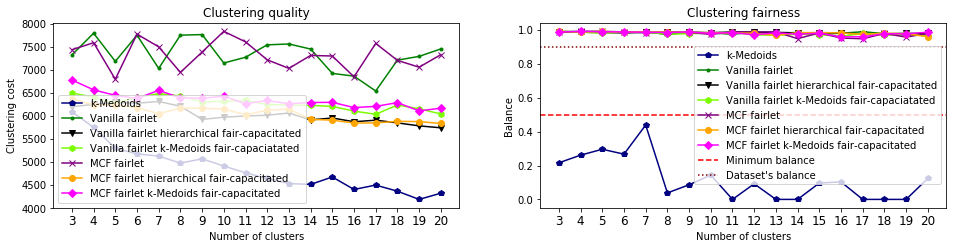

In [57]:
unfair_degrees = [i for i in range(3, degrees+1)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 3.4))
#ax[0].plot(unfair_costs, marker='s', color='blue', label="k-Center")
ax[0].plot(kmedoid_costs, marker='p', color='navy', label="k-Medoids")
ax[0].plot(vanilla_costs, marker='.', color='green', label="Vanilla fairlet")
ax[0].plot(vanilla_costs_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[0].plot(vanilla_costs_kmedoids_knapsack, marker='h', color='lawngreen', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[0].plot(mcf_costs, marker='x', color='purple', label="MCF fairlet")
ax[0].plot(mcf_costs_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[0].plot(mcf_costs_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[0].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[0].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[0].set_title("Clustering quality")
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Clustering cost")
ax[0].legend()
#ax[1].plot(unfair_balances, marker='s', color='blue', label="k-Center")
ax[1].plot(kmedoid_balances, marker='p', color='navy', label="k-Medoids")
ax[1].plot(vanilla_balances, marker='.', color='green', label="Vanilla fairlet")
ax[1].plot(vanilla_balances_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[1].plot(vanilla_balances_kmedoids_knapsack, marker='h', color='lawngreen', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[1].plot(mcf_balances, marker='x', color='purple', label="MCF fairlet")
ax[1].plot(mcf_balances_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[1].plot(mcf_balances_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[1].axhline(0.5, color='red', linestyle='--', label="Minimum balance")
ax[1].axhline(len(reds)/len(blues), color='maroon', linestyle='dotted', label="Dataset's balance")
ax[1].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[1].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[1].set_title("Clustering fairness")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Balance")
ax[1].legend()
plt.savefig('Plot_pisa_new.pdf',bbox_inches='tight')
plt.show()

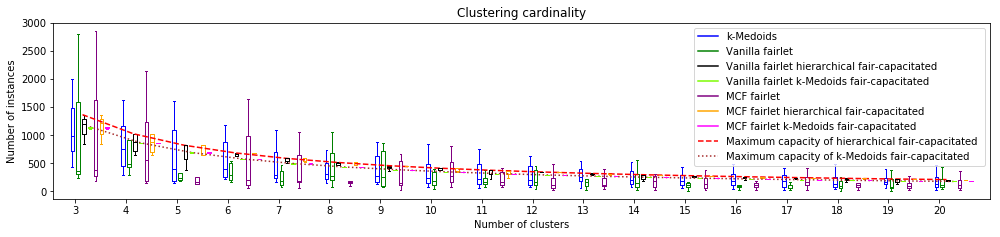

In [58]:
import matplotlib.pyplot as plt
import numpy as np

xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
#for plot ideal capacity
xtrend = [1]
for i in range(1,18):
    xtrend.append(i*7+1)
    
xtrend_2 = [2]
for i in range(1,18):
    xtrend_2.append(i*7+2)
    
ticks = xvalue

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(14,3.4))

bpl = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0-0.4, sym='', widths=0.5)
#bpm = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0+0.4, sym='', widths=0.5)
bpr = plt.boxplot(vanilla_capacities, positions=np.array(range(len(vanilla_capacities)))*7.0+0.4, sym='', widths=0.5)
bpn = plt.boxplot(vanilla_capacitated_capacities, positions=np.array(range(len(vanilla_capacitated_capacities)))*7.0+1.2, sym='', widths=0.5)
bpk = plt.boxplot(vanilla_kmedoids_knapsack_capacities, positions=np.array(range(len(vanilla_kmedoids_knapsack_capacities)))*7.0+2.0, sym='', widths=0.5)
bpd = plt.boxplot(mcf_capacities, positions=np.array(range(len(mcf_capacities)))*7+2.8, sym='', widths=0.5)
bpe = plt.boxplot(mcf_capacitated_capacities, positions=np.array(range(len(mcf_capacitated_capacities)))*7.0+3.6, sym='', widths=0.5)
bpkm = plt.boxplot(mcf_kmedoid_knapsack_capacities, positions=np.array(range(len(mcf_kmedoid_knapsack_capacities)))*7.0+4.4, sym='', widths=0.5)

set_box_color(bpl, 'blue') # colors are from http://colorbrewer2.org/
#set_box_color(bpm, 'navy')
set_box_color(bpr, 'green')
set_box_color(bpn, 'black')
set_box_color(bpk, 'lawngreen')
set_box_color(bpd, 'purple')
set_box_color(bpe, 'orange')
set_box_color(bpkm, 'fuchsia')


# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='blue', label='k-Medoids')
#plt.plot([], c='navy', label='K-Medoids')
plt.plot([], c='green', label='Vanilla fairlet')
plt.plot([], c='black', label='Vanilla fairlet hierarchical fair-capacitated')
plt.plot([], c='lawngreen', label='Vanilla fairlet k-Medoids fair-capacitated')
plt.plot([], c='purple', label='MCF fairlet')
plt.plot([], c='orange', label='MCF fairlet hierarchical fair-capacitated')
plt.plot([], c='fuchsia', label='MCF fairlet k-Medoids fair-capacitated')
plt.plot(xtrend,mcf_capacitated_ideal_capacity,linestyle='--',c='red',label='Maximum capacity of hierarchical fair-capacitated ')
plt.plot(xtrend_2,mcf_kmedoid_knapsack_ideal_capacity,linestyle='dotted',c='brown',label='Maximum capacity of k-Medoids fair-capacitated')

plt.legend()

plt.xticks(range(0, len(ticks) * 7, 7), ticks)
#plt.xticks(xtrue, ticks)
plt.xlim(-3, len(ticks)*7)
plt.title("Clustering cardinality")
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
#plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare-pisa_new.pdf')

## OULAD

In [59]:
#Clustering cost
df=pd.read_csv('result-cost-oulad.csv')
kmedoid_costs = list(df['k-Medoids'].values)
vanilla_costs = list(df['Vanilla Fairlet'].values)
vanilla_costs_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_costs_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_costs = list(df['MCF Fairlet'].values)
mcf_costs_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_costs_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Fairness
df=pd.read_csv('result-balances-oulad.csv')
kmedoid_balances = list(df['k-Medoids'].values)
vanilla_balances = list(df['Vanilla Fairlet'].values)
vanilla_balances_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_balances_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_balances = list(df['MCF Fairlet'].values)
mcf_balances_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_balances_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Cardinality
import math
#kcenter
df=pd.read_csv("result-capacity-kmedoid-oulad.csv",na_filter=True,header=0)
x=df.values
kmedoid_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    kmedoid_capacities.append(temp)

#vanilla fairlets
df=pd.read_csv("result-capacity-vanilla-oulad.csv",na_filter=True,header=0)
x=df.values
vanilla_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacities.append(temp)

#vanilla hierarchical
df=pd.read_csv("result-capacity-vanilla-hierarchical-oulad.csv",na_filter=True,header=0)
x=df.values
vanilla_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacitated_capacities.append(temp)
    
#vanilla kmedoids-knapsack
df=pd.read_csv("result-capacity-vanilla-kmedoids-knapsack-oulad.csv",na_filter=True,header=0)
x=df.values
vanilla_kmedoids_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_kmedoids_knapsack_capacities.append(temp)
    
#mcf
df=pd.read_csv("result-capacity-mcf-oulad.csv",na_filter=True,header=0)
x=df.values
mcf_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacities.append(temp)
    
#mcf hierarchical
df=pd.read_csv("result-capacity-mcf-hierarchical-oulad.csv",na_filter=True,header=0)
x=df.values
mcf_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacitated_capacities.append(temp)
    
#mcf kmedoids-knapsack
df=pd.read_csv("result-capacity-mcf-kmedoids-knapsack-oulad.csv",na_filter=True,header=0)
x=df.values
mcf_kmedoid_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_kmedoid_knapsack_capacities.append(temp)

#Maximum capacities
df=pd.read_csv("result-capacity-oulad.csv",na_filter=True,header=0)
mcf_capacitated_ideal_capacity = list(df['Maximum capacity of Hierarchical Capacitated'].values)
mcf_kmedoid_knapsack_ideal_capacity = list(df['Maximum capacity of k-Medoid-knapsack Capacitated'].values)

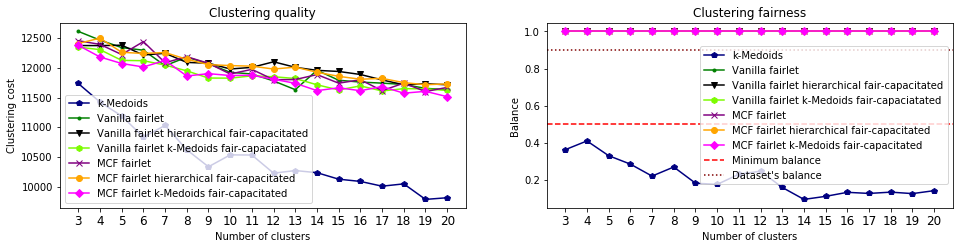

In [60]:
unfair_degrees = [i for i in range(3, degrees+1)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 3.4))
#ax[0].plot(unfair_costs, marker='s', color='blue', label="k-Center")
ax[0].plot(kmedoid_costs, marker='p', color='navy', label="k-Medoids")
ax[0].plot(vanilla_costs, marker='.', color='green', label="Vanilla fairlet")
ax[0].plot(vanilla_costs_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[0].plot(vanilla_costs_kmedoids_knapsack, marker='h', color='lawngreen', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[0].plot(mcf_costs, marker='x', color='purple', label="MCF fairlet")
ax[0].plot(mcf_costs_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[0].plot(mcf_costs_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[0].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[0].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[0].set_title("Clustering quality")
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Clustering cost")
ax[0].legend()
#ax[1].plot(unfair_balances, marker='s', color='blue', label="k-Center")
ax[1].plot(kmedoid_balances, marker='p', color='navy', label="k-Medoids")
ax[1].plot(vanilla_balances, marker='.', color='green', label="Vanilla fairlet")
ax[1].plot(vanilla_balances_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[1].plot(vanilla_balances_kmedoids_knapsack, marker='h', color='lawngreen', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[1].plot(mcf_balances, marker='x', color='purple', label="MCF fairlet")
ax[1].plot(mcf_balances_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[1].plot(mcf_balances_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[1].axhline(0.5, color='red', linestyle='--', label="Minimum balance")
ax[1].axhline(len(reds)/len(blues), color='maroon', linestyle='dotted', label="Dataset's balance")
ax[1].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[1].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[1].set_title("Clustering fairness")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Balance")
ax[1].legend()
plt.savefig('Plot_oulad_new.pdf',bbox_inches='tight')
plt.show()

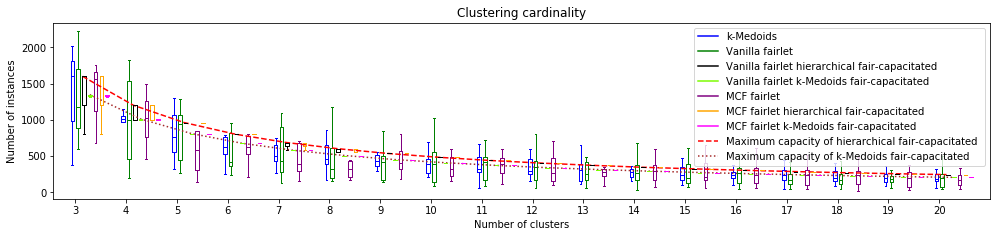

In [61]:
import matplotlib.pyplot as plt
import numpy as np

xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
#for plot ideal capacity
xtrend = [1]
for i in range(1,18):
    xtrend.append(i*7+1)
    
xtrend_2 = [2]
for i in range(1,18):
    xtrend_2.append(i*7+2)
    
ticks = xvalue

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(14,3.4))

bpl = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0-0.4, sym='', widths=0.5)
#bpm = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0+0.4, sym='', widths=0.5)
bpr = plt.boxplot(vanilla_capacities, positions=np.array(range(len(vanilla_capacities)))*7.0+0.4, sym='', widths=0.5)
bpn = plt.boxplot(vanilla_capacitated_capacities, positions=np.array(range(len(vanilla_capacitated_capacities)))*7.0+1.2, sym='', widths=0.5)
bpk = plt.boxplot(vanilla_kmedoids_knapsack_capacities, positions=np.array(range(len(vanilla_kmedoids_knapsack_capacities)))*7.0+2.0, sym='', widths=0.5)
bpd = plt.boxplot(mcf_capacities, positions=np.array(range(len(mcf_capacities)))*7+2.8, sym='', widths=0.5)
bpe = plt.boxplot(mcf_capacitated_capacities, positions=np.array(range(len(mcf_capacitated_capacities)))*7.0+3.6, sym='', widths=0.5)
bpkm = plt.boxplot(mcf_kmedoid_knapsack_capacities, positions=np.array(range(len(mcf_kmedoid_knapsack_capacities)))*7.0+4.4, sym='', widths=0.5)

set_box_color(bpl, 'blue') # colors are from http://colorbrewer2.org/
#set_box_color(bpm, 'navy')
set_box_color(bpr, 'green')
set_box_color(bpn, 'black')
set_box_color(bpk, 'lawngreen')
set_box_color(bpd, 'purple')
set_box_color(bpe, 'orange')
set_box_color(bpkm, 'fuchsia')


# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='blue', label='k-Medoids')
#plt.plot([], c='navy', label='K-Medoids')
plt.plot([], c='green', label='Vanilla fairlet')
plt.plot([], c='black', label='Vanilla fairlet hierarchical fair-capacitated')
plt.plot([], c='lawngreen', label='Vanilla fairlet k-Medoids fair-capacitated')
plt.plot([], c='purple', label='MCF fairlet')
plt.plot([], c='orange', label='MCF fairlet hierarchical fair-capacitated')
plt.plot([], c='fuchsia', label='MCF fairlet k-Medoids fair-capacitated')
plt.plot(xtrend,mcf_capacitated_ideal_capacity,linestyle='--',c='red',label='Maximum capacity of hierarchical fair-capacitated ')
plt.plot(xtrend_2,mcf_kmedoid_knapsack_ideal_capacity,linestyle='dotted',c='brown',label='Maximum capacity of k-Medoids fair-capacitated')

plt.legend()

plt.xticks(range(0, len(ticks) * 7, 7), ticks)
#plt.xticks(xtrue, ticks)
plt.xlim(-3, len(ticks)*7)
plt.title("Clustering cardinality")
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
#plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare-oulad_new.pdf')

## MOOC

In [62]:
#Clustering cost
df=pd.read_csv('result-cost-mooc.csv')
kmedoid_costs = list(df['k-Medoids'].values)
vanilla_costs = list(df['Vanilla Fairlet'].values)
vanilla_costs_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_costs_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_costs = list(df['MCF Fairlet'].values)
mcf_costs_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_costs_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Fairness
df=pd.read_csv('result-balances-mooc.csv')
kmedoid_balances = list(df['k-Medoids'].values)
vanilla_balances = list(df['Vanilla Fairlet'].values)
vanilla_balances_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_balances_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_balances = list(df['MCF Fairlet'].values)
mcf_balances_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_balances_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Cardinality
import math
#kcenter
df=pd.read_csv("result-capacity-kmedoid-mooc.csv",na_filter=True,header=0)
x=df.values
kmedoid_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    kmedoid_capacities.append(temp)

#vanilla fairlets
df=pd.read_csv("result-capacity-vanilla-mooc.csv",na_filter=True,header=0)
x=df.values
vanilla_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacities.append(temp)

#vanilla hierarchical
df=pd.read_csv("result-capacity-vanilla-hierarchical-mooc.csv",na_filter=True,header=0)
x=df.values
vanilla_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacitated_capacities.append(temp)
    
#vanilla kmedoids-knapsack
df=pd.read_csv("result-capacity-vanilla-kmedoids-knapsack-mooc.csv",na_filter=True,header=0)
x=df.values
vanilla_kmedoids_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_kmedoids_knapsack_capacities.append(temp)
    
#mcf
df=pd.read_csv("result-capacity-mcf-mooc.csv",na_filter=True,header=0)
x=df.values
mcf_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacities.append(temp)
    
#mcf hierarchical
df=pd.read_csv("result-capacity-mcf-hierarchical-mooc.csv",na_filter=True,header=0)
x=df.values
mcf_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacitated_capacities.append(temp)
    
#mcf kmedoids-knapsack
df=pd.read_csv("result-capacity-mcf-kmedoids-knapsack-mooc.csv",na_filter=True,header=0)
x=df.values
mcf_kmedoid_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_kmedoid_knapsack_capacities.append(temp)

#Maximum capacities
df=pd.read_csv("result-capacity-mooc.csv",na_filter=True,header=0)
mcf_capacitated_ideal_capacity = list(df['Maximum capacity of Hierarchical Capacitated'].values)
mcf_kmedoid_knapsack_ideal_capacity = list(df['Maximum capacity of k-Medoid-knapsack Capacitated'].values)


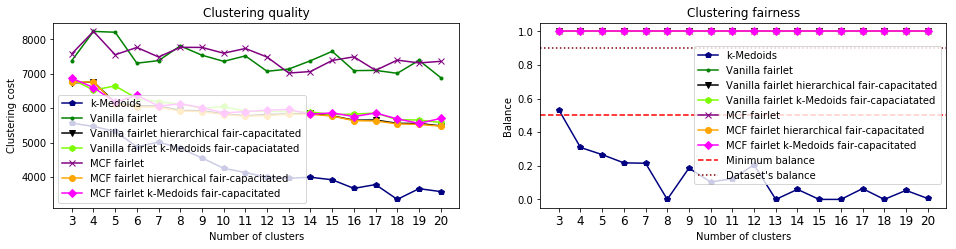

In [63]:
unfair_degrees = [i for i in range(3, degrees+1)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 3.4))
#ax[0].plot(unfair_costs, marker='s', color='blue', label="k-Center")
ax[0].plot(kmedoid_costs, marker='p', color='navy', label="k-Medoids")
ax[0].plot(vanilla_costs, marker='.', color='green', label="Vanilla fairlet")
ax[0].plot(vanilla_costs_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[0].plot(vanilla_costs_kmedoids_knapsack, marker='h', color='lawngreen', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[0].plot(mcf_costs, marker='x', color='purple', label="MCF fairlet")
ax[0].plot(mcf_costs_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[0].plot(mcf_costs_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[0].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[0].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[0].set_title("Clustering quality")
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Clustering cost")
ax[0].legend()
#ax[1].plot(unfair_balances, marker='s', color='blue', label="k-Center")
ax[1].plot(kmedoid_balances, marker='p', color='navy', label="k-Medoids")
ax[1].plot(vanilla_balances, marker='.', color='green', label="Vanilla fairlet")
ax[1].plot(vanilla_balances_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[1].plot(vanilla_balances_kmedoids_knapsack, marker='h', color='lawngreen', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[1].plot(mcf_balances, marker='x', color='purple', label="MCF fairlet")
ax[1].plot(mcf_balances_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[1].plot(mcf_balances_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[1].axhline(0.5, color='red', linestyle='--', label="Minimum balance")
ax[1].axhline(len(reds)/len(blues), color='maroon', linestyle='dotted', label="Dataset's balance")
ax[1].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[1].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[1].set_title("Clustering fairness")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Balance")
ax[1].legend()
plt.savefig('Plot_mooc_new.pdf',bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
#for plot ideal capacity
xtrend = [1]
for i in range(1,18):
    xtrend.append(i*7+1)
    
xtrend_2 = [2]
for i in range(1,18):
    xtrend_2.append(i*7+2)
    
ticks = xvalue

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(14,3.4))

bpl = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0-0.4, sym='', widths=0.5)
#bpm = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0+0.4, sym='', widths=0.5)
bpr = plt.boxplot(vanilla_capacities, positions=np.array(range(len(vanilla_capacities)))*7.0+0.4, sym='', widths=0.5)
bpn = plt.boxplot(vanilla_capacitated_capacities, positions=np.array(range(len(vanilla_capacitated_capacities)))*7.0+1.2, sym='', widths=0.5)
bpk = plt.boxplot(vanilla_kmedoids_knapsack_capacities, positions=np.array(range(len(vanilla_kmedoids_knapsack_capacities)))*7.0+2.0, sym='', widths=0.5)
bpd = plt.boxplot(mcf_capacities, positions=np.array(range(len(mcf_capacities)))*7+2.8, sym='', widths=0.5)
bpe = plt.boxplot(mcf_capacitated_capacities, positions=np.array(range(len(mcf_capacitated_capacities)))*7.0+3.6, sym='', widths=0.5)
bpkm = plt.boxplot(mcf_kmedoid_knapsack_capacities, positions=np.array(range(len(mcf_kmedoid_knapsack_capacities)))*7.0+4.4, sym='', widths=0.5)

set_box_color(bpl, 'blue') # colors are from http://colorbrewer2.org/
#set_box_color(bpm, 'navy')
set_box_color(bpr, 'green')
set_box_color(bpn, 'black')
set_box_color(bpk, 'lawngreen')
set_box_color(bpd, 'purple')
set_box_color(bpe, 'orange')
set_box_color(bpkm, 'fuchsia')


# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='blue', label='k-Medoids')
#plt.plot([], c='navy', label='K-Medoids')
plt.plot([], c='green', label='Vanilla fairlet')
plt.plot([], c='black', label='Vanilla fairlet hierarchical fair-capacitated')
plt.plot([], c='lawngreen', label='Vanilla fairlet k-Medoids fair-capacitated')
plt.plot([], c='purple', label='MCF fairlet')
plt.plot([], c='orange', label='MCF fairlet hierarchical fair-capacitated')
plt.plot([], c='fuchsia', label='MCF fairlet k-Medoids fair-capacitated')
plt.plot(xtrend,mcf_capacitated_ideal_capacity,linestyle='--',c='red',label='Maximum capacity of hierarchical fair-capacitated ')
plt.plot(xtrend_2,mcf_kmedoid_knapsack_ideal_capacity,linestyle='dotted',c='brown',label='Maximum capacity of k-Medoids fair-capacitated')

plt.legend()

plt.xticks(range(0, len(ticks) * 7, 7), ticks)
#plt.xticks(xtrue, ticks)
plt.xlim(-3, len(ticks)*7)
plt.title("Clustering cardinality")
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
#plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare-mooc_new.pdf')